<a href="https://colab.research.google.com/github/Riya222-Herald/Artificial-Intelligence-and-Machine-Learning/blob/master/Worksheet5_RiyaPradhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
print(x_train.shape)
print(x_test.shape)
x_train = np.expand_dims(x_train, axis=-1) # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [5]:
print(y_train[0])

5


In [6]:
model = keras.Sequential([
layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation="relu"),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(128, activation="relu"),
layers.Dense(10, activation="softmax") # 10 classes for MNIST digits
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer="adam",

loss="sparse_categorical_crossentropy", # labels are in integer
metrics=["accuracy"])

In [11]:
model.fit(x_train, y_train, epochs=1, batch_size=32, validation_data=(x_test, y_test))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9813 - loss: 0.0628 - val_accuracy: 0.9886 - val_loss: 0.0339


In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9849 - loss: 0.0435
Test accuracy: 0.9886


In [13]:
predictions = model.predict(x_test[:5])
print(predictions.shape)
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted labels:", predicted_labels)
print("Actual labels: ", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
(5, 10)
Predicted labels: [7 2 1 0 4]
Actual labels:  [7 2 1 0 4]


# Worksheet 5

# Implement an End to End CNN Model for Image Classification Task.

# Task 1: Data Understanding and Visualization:

Download the Provided Data and Complete the following task.

1. Load and visualize images from a dataset stored in directories, where each subdirec-
tory represents a class. You are expected to write a code:

• Get the list of class directories from the train folder.
• Select one image randomly from each class.
• Display the images in a grid format with two rows using matplotlib.
• What did you Observe?

Visualizing TRAIN samples


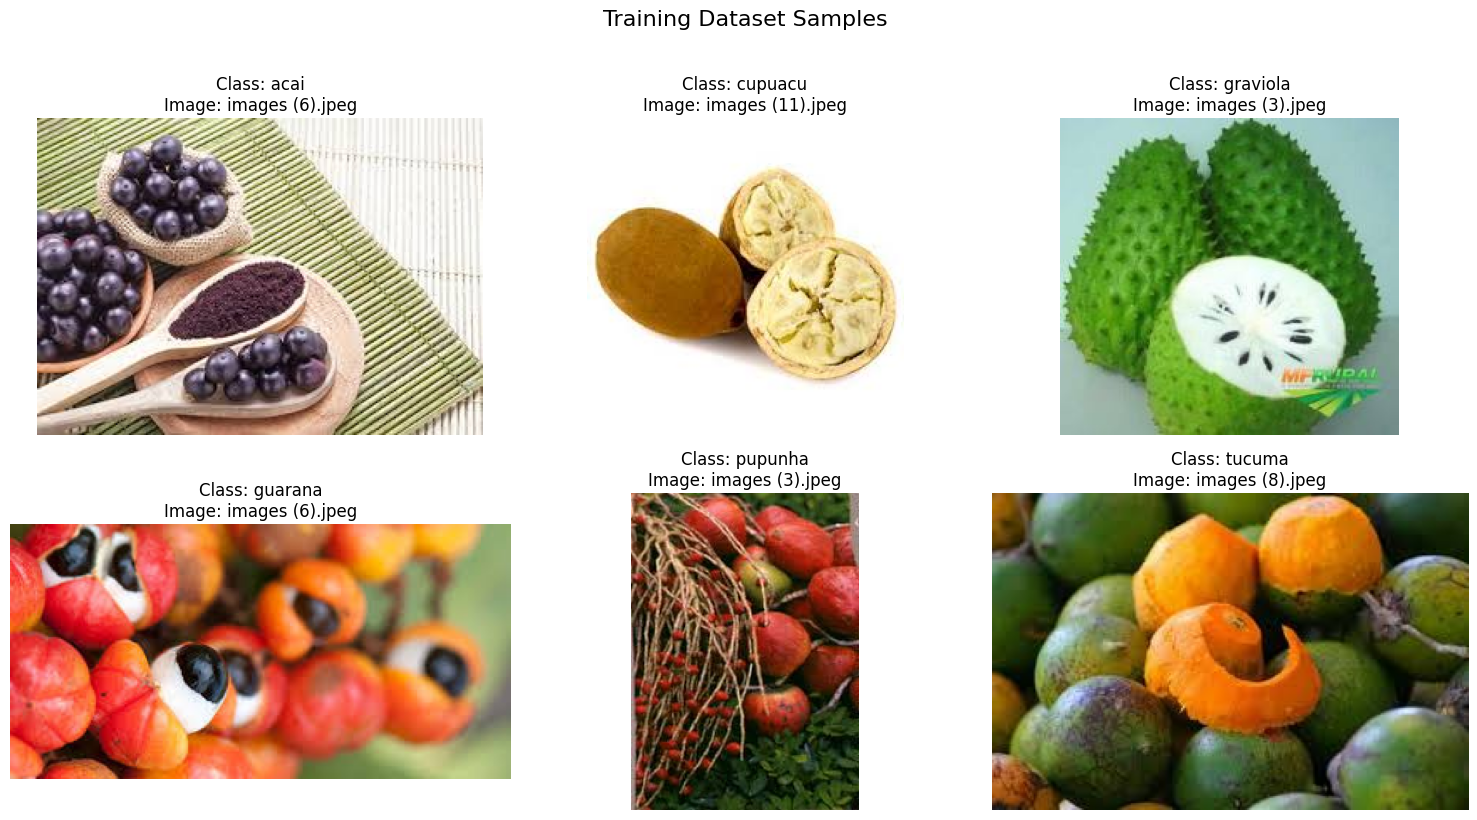

In [14]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def visualize_random_samples(train_path, test_path=None, rows=2):

    # Function to process a single directory
    def process_directory(dataset_path, title_prefix=""):
        class_dirs = sorted([d for d in os.listdir(dataset_path)
                           if os.path.isdir(os.path.join(dataset_path, d))])

        num_classes = len(class_dirs)
        cols = (num_classes + 1) // rows

        plt.figure(figsize=(15, 8))
        plt.suptitle(f"{title_prefix} Dataset Samples", y=1.02, fontsize=16)

        for i, class_dir in enumerate(class_dirs):
            class_path = os.path.join(dataset_path, class_dir)
            images = [f for f in os.listdir(class_path)
                     if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

            if not images:
                print(f"No images found in class: {class_dir}")
                continue

            random_image = random.choice(images)
            img_path = os.path.join(class_path, random_image)

            img = Image.open(img_path)

            ax = plt.subplot(rows, cols, i+1)
            ax.imshow(img)
            ax.set_title(f"Class: {class_dir}\nImage: {random_image}")
            ax.axis('off')

        plt.tight_layout()
        plt.show()

    print("Visualizing TRAIN samples")
    process_directory(train_path, "Training")

train_path = "/content/drive/MyDrive/AI ML Workshops and tutorials/week 5/FruitinAmazon/train"
test_path = "/content/drive/MyDrive/AI ML Workshops and tutorials/week 5/FruitinAmazon/test"

visualize_random_samples(train_path)

2. Check for Corrupted Image: Write a script that verifies whether the image in the train directory are valid. If any corrupted images are found, the script must remove the image from the directory and print the message which image have been removed, if none found print ”No Corrupted Images Found.”

• Hint:

– Iterate through each class subdirectory and check if each image is valid.

– Use the Image.open() function to attempt to load each image.
– If the image is corrupted i.e. raises an IOError or SyntaxError, remove the image from the directory and print f"Removed corrupted image: {image_path}".

– Maintain a list of all corrupted image paths for reporting.

• Expected Output: No corrupted images found.

In [15]:
import os
from PIL import Image
from PIL import UnidentifiedImageError

def check_and_remove_corrupted_images(dataset_path):
    corrupted_images = []

    for root, _, files in os.walk(dataset_path):
        for filename in files:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                file_path = os.path.join(root, filename)
                try:
                    with Image.open(file_path) as img:
                        img.verify()
                        img.close()

                except (IOError, SyntaxError, UnidentifiedImageError) as e:

                    corrupted_images.append(file_path)
                    os.remove(file_path)
                    print(f"Removed corrupted image: {file_path} (Error: {str(e)})")

    if not corrupted_images:
        print("No corrupted images found.")
    else:
        print(f"\nSummary: Removed {len(corrupted_images)} corrupted images.")

    return corrupted_images


train_path = "/content/drive/MyDrive/AI ML Workshops and tutorials/week 5/FruitinAmazon/train"
check_and_remove_corrupted_images(train_path)

No corrupted images found.


[]

# Task 2: Loading and Preprocessing Image Data in keras:
In this section, we will load and preprocess image data from a directory using the
image dataset from directory function in Keras.

This function is used to load images from a directory structure where subdirectories represent different
classes. We will also apply basic preprocessing, including resizing and batching and normalization of
images. The same function can be used to load train and validation data.

In [17]:
import tensorflow as tf

# Define image size and batch size
img_height = 128  # Example image height
img_width = 128   # Example image width
batch_size = 32
validation_split = 0.2  # 80% training, 20% validation
train_dir = "/content/drive/MyDrive/AI ML Workshops and tutorials/week 5/FruitinAmazon/train"

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1. / 255)  # Normalize pixel values to [0, 1]

# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))


# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


# Task 3 - Implement a CNN with
Follow the following Structure and Hyper - parameters:
# Convolutional Architecture:
• Convolutional Layer 1:

– Filter Size (F): (3, 3)

– Number of Filters (k): 32

– Padding (P): same

– Stride (s): 1

• Activation Layer: ReLU activation

• Pooling Layer 1: Max pooling
– Filter Size (F): (2, 2)
– Stride (s): 2

• Convolutional Layer 2:
– Filter Size (F): (3, 3)
– Number of Filters (k): 32
– Padding (P): same
– Stride (s): 1

• Activation Layer: ReLU activation

• Pooling Layer 2: Max pooling

– Filter Size (F): (2, 2)

– Stride (s): 2
# Fully Connected Network Architecture:
• Flatten Layer: Flatten the input coming from the convolutional layers
• Input Layer:
• Hidden Layer - 2:

– Number of Neurons: 64

– Number of Neurons: 128

• Output Layer:
– Number of Neurons: num classes (number of output classes)

In [18]:
from tensorflow.keras import layers, models

def build_cnn_model(input_shape=(128, 128, 3), num_classes=10):

    model = models.Sequential()

    # Convolutional Architecture
    # Block 1
    model.add(layers.Conv2D(32, (3, 3),
                            strides=(1, 1),
                            padding='same',
                            activation='relu',
                            input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # Block 2
    model.add(layers.Conv2D(32, (3, 3),
                            strides=(1, 1),
                            padding='same',
                            activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # Fully Connected Network Architecture
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create the model instance
cnn_model = build_cnn_model()

# Print the model summary
cnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,970 (8.08 MB)

 Trainable params: 2,116,970 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

# Task 4: Compile the Model
Model Compilation
• Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
and evaluation metric (e.g., accuracy).

# Task 4: Train the Model
Model Training
• Use the model.fit() function to train the model. Set the batch size to 16 and the number of epochs
to 250.
• Use val ds for validation.

• Use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model and avoid-
ing overfitting.

In [19]:
from tensorflow.keras import optimizers, callbacks

cnn_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

checkpoint_cb = callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_accuracy")
early_stopping_cb = callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor="val_loss")

history = cnn_model.fit(
    train_ds,
    validation_data=val_ds,
    batch_size=16,
    epochs=250,
    callbacks=[checkpoint_cb, early_stopping_cb],
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.0394 - loss: 2.2974

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 339ms/step - accuracy: 0.0434 - loss: 2.2904 - val_accuracy: 0.5000 - val_loss: 1.8370
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.3652 - loss: 1.8574

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step - accuracy: 0.3641 - loss: 1.8458 - val_accuracy: 0.7222 - val_loss: 1.3114
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 489ms/step - accuracy: 0.3446 - loss: 1.5582 - val_accuracy: 0.5000 - val_loss: 1.5543
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step - accuracy: 0.7075 - loss: 1.1782 - val_accuracy: 0.2778 - val_loss: 1.3240
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.6551 - loss: 0.9481

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step - accuracy: 0.6545 - loss: 0.9450 - val_accuracy: 0.9444 - val_loss: 0.6327
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - accuracy: 0.7409 - loss: 0.8416 - val_accuracy: 0.7778 - val_loss: 0.8786
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 280ms/step - accuracy: 0.8416 - loss: 0.6423 - val_accuracy: 0.7778 - val_loss: 0.9289
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 626ms/step - accuracy: 0.8898 - loss: 0.4965 - val_accuracy: 0.7222 - val_loss: 0.8329
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 527ms/step - accuracy: 0.9045 - loss: 0.3320 - val_accuracy: 0.8889 - val_loss: 0.4037
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 923ms/step - accuracy: 0.9783 - loss: 0.2045 - val_accuracy: 0.8889 - val_loss: 0.4293
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 405ms/step - accuracy: 0.9891 - loss: 0.1254 - val_accuracy: 0.7778 - val_loss: 1.0151
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 284ms/step - accuracy: 0.9783 - loss: 0.1172 - val_accuracy: 0.8333 - val_loss: 

# Task 5: Evaluate the Model
Model Evaluation
• After training, evaluate the model using model.evaluate() on the test set to check the test
accuracy and loss.

In [20]:
from tensorflow.keras.models import load_model

best_model = load_model("best_model.h5")

test_loss, test_accuracy = best_model.evaluate(train_ds)

print(f"Training Loss: {test_loss:.4f}")
print(f"Training Accuracy: {test_accuracy:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.7587 - loss: 0.8345 
Training Loss: 0.8669
Training Accuracy: 0.7361


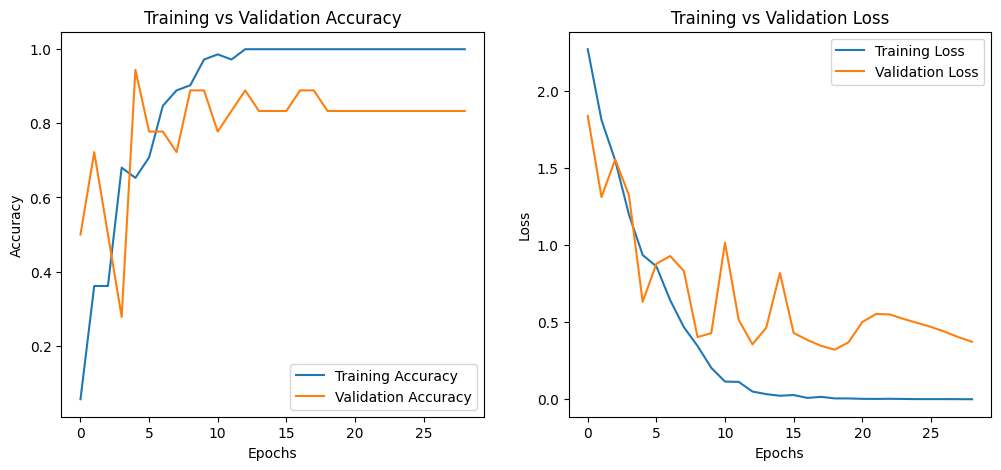

In [21]:
import matplotlib.pyplot as plt

# Extract loss and accuracy from history
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs_range = range(len(train_loss))

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

plt.show()


# Task 6: Save and Load the Model
Model Saving and Loading
• Save the trained model to an .h5 file using model.save().
• Load the saved model and re-evaluate its performance on the test set.

In [22]:
from tensorflow.keras.models import load_model

loaded_model = load_model('best_model.h5')
loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,972 (8.08 MB)

 Trainable params: 2,116,970 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# Task 7: Predictions and Classification Report
Making Predictions
• Use model.predict() to make predictions on test images.
• Convert the model’s predicted probabilities to digit labels using np.argmax().
• Also use from sklearn.metrics import classification report to report the Classification
Report of your Model Performance.

In [23]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/AI ML Workshops and tutorials/week 5/FruitinAmazon/test',
    image_size=(128, 128),
    batch_size= 32
)

rescale = tf.keras.layers.Rescaling(1./255)
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 30 files belonging to 6 classes.


In [24]:
train_path = "/content/drive/MyDrive/AI ML Workshops and tutorials/week 5/FruitinAmazon/train"
class_names = sorted([d for d in os.listdir(train_path)
                    if os.path.isdir(os.path.join(train_path, d))])
print("Class names:", class_names)

Class names: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


In [25]:
import numpy as np
from sklearn.metrics import classification_report

y_pred_probs = best_model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = np.concatenate([y for x, y in test_ds], axis=0)

report = classification_report(y_true, y_pred, target_names=class_names)

print("Classification Report:")
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Classification Report:
              precision    recall  f1-score   support

        acai       0.00      0.00      0.00         5
     cupuacu       0.00      0.00      0.00         5
    graviola       0.21      0.60      0.32         5
     guarana       0.00      0.00      0.00         5
     pupunha       0.00      0.00      0.00         5
      tucuma       0.36      0.80      0.50         5

    accuracy                           0.23        30
   macro avg       0.10      0.23      0.14        30
weighted avg       0.10      0.23      0.14        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
